<div id="animated-container" style="position: relative;
            border-radius: 10px;
            padding: 10px;
            font-family: Arial, sans-serif;
            font-size: 36px;
            font-weight: 900;
            color: black;
            display: inline-block;
            text-transform: uppercase;
            box-shadow: 2px 2px 4px #888;
            text-shadow: 2px 2px 4px #888;
            overflow: hidden;
            background-color: #800606 ;
            cursor: pointer;" onclick="toggleAnimation()"> <!-- Added cursor pointer and onclick event -->
    <div style="position: absolute;
                top: 50%;
                right: 0; /* Adjusted to place on the right side */
                transform: translateY(45%);">
        <!-- <img src="https://www.kaggle.com/static/images/tier-animation-transparent.gif" alt="Cartoon Character" style="height: 100px; width: auto;"> -->
    </div>
    <div style="font-weight: bold;"></div>
    <span style="font-style: italic; text-shadow: 2px 2px 4px #888; color: white;">Breast Cancer</span>
         <img src="https://www.kaggle.com/static/images/tier-animation-transparent.gif" alt="Cartoon Character" style="height: 100px; width: auto;">
</div>

<script>
    function toggleAnimation() {
        var container = document.getElementById('animated-container');
        var animationDiv = container.querySelector('div');
        if (animationDiv.style.animationPlayState === 'paused') {
            animationDiv.style.animationPlayState = 'running';
        } else {
            animationDiv.style.animationPlayState = 'paused';
        }
    }
</script>


<img src="https://img.freepik.com/premium-photo/3d-visualization-medical-backdrop-featuring-abstract-virus-cells-dna-strands-generated-ai_305467-643.jpg" style="width:100%">

<span style="color:#800606; font-size: 200%; font-weight: bold;">Author: Muhammad Danish Mubashar</span>

<span style="color:#800606; font-size: 150%; font-weight: bold;">Hi 👋👋! Welcome to my notebook. I'm Danish Mubashar and passionate about data science, and I'm excited to share my findings with you. In my recent notebook, I successfully implemented Breast Cancer. If you find this notebook helpful, please || UPVOTE || ❤️</span>

# About Dataset

- Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass, describing characteristics of the cell nuclei.
- The 3-dimensional space is described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].
- This database is available through the UW CS ftp server: `ftp ftp.cs.wisc.edu`, directory `math-prog/cpo-dataset/machine-learn/WDBC/`.
- Also accessible on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).

### Attribute Information:

1. ID number
2. Diagnosis (M = malignant, B = benign)
3-32. Ten real-valued features are computed for each cell nucleus:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant


<span style="color:#800606; font-size: 200%; font-weight: bold;">Table of Contents</span>

| **Section**     | 
|-----------------|
| [Libraries](#1) | 
| [EDA](#2)       |
| [Outliers](#3)      | 
| [PCA](#4)   | 
| [Machine Learning](#5)    | 


<a id="1"></a>
<div id="animated-container" style="position: relative;
            border-radius: 10px;
            padding: 10px;
            font-family: Arial, sans-serif;
            font-size: 36px;
            font-weight: 900;
            color: black;
            display: inline-block;
            text-transform: uppercase;
            box-shadow: 2px 2px 4px #888;
            text-shadow: 2px 2px 4px #888;
            overflow: hidden;
            background-color: #800606 ;
            cursor: pointer;" onclick="toggleAnimation()"> <!-- Added cursor pointer and onclick event -->
    <div style="position: absolute;
                top: 50%;
                right: 0; /* Adjusted to place on the right side */
                transform: translateY(45%);">
        <!-- <img src="https://www.kaggle.com/static/images/tier-animation-transparent.gif" alt="Cartoon Character" style="height: 100px; width: auto;"> -->
    </div>
    <div style="font-weight: bold;"></div>
    <span style="font-style: italic; text-shadow: 2px 2px 4px #888; color: white;">Libraries</span>
         <img src="https://www.kaggle.com/static/images/tier-animation-transparent.gif" alt="Cartoon Character" style="height: 50px; width: auto;">
</div>

<script>
    function toggleAnimation() {
        var container = document.getElementById('animated-container');
        var animationDiv = container.querySelector('div');
        if (animationDiv.style.animationPlayState === 'paused') {
            animationDiv.style.animationPlayState = 'running';
        } else {
            animationDiv.style.animationPlayState = 'paused';
        }
    }
</script>


In [1]:
# import libraries
import pandas as pd 
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

<a id="2"></a>
<div id="animated-container" style="position: relative;
            border-radius: 10px;
            padding: 10px;
            font-family: Arial, sans-serif;
            font-size: 36px;
            font-weight: 900;
            color: black;
            display: inline-block;
            text-transform: uppercase;
            box-shadow: 2px 2px 4px #888;
            text-shadow: 2px 2px 4px #888;
            overflow: hidden;
            background-color: #800606 ;
            cursor: pointer;" onclick="toggleAnimation()"> <!-- Added cursor pointer and onclick event -->
    <div style="position: absolute;
                top: 50%;
                right: 0; /* Adjusted to place on the right side */
                transform: translateY(45%);">
        <!-- <img src="https://www.kaggle.com/static/images/tier-animation-transparent.gif" alt="Cartoon Character" style="height: 100px; width: auto;"> -->
    </div>
    <div style="font-weight: bold;"></div>
    <span style="font-style: italic; text-shadow: 2px 2px 4px #888; color: white;">Exploratory Data Analysis (EDA)</span>
         <img src="https://www.kaggle.com/static/images/tier-animation-transparent.gif" alt="Cartoon Character" style="height: 50px; width: auto;">
</div>

<script>
    function toggleAnimation() {
        var container = document.getElementById('animated-container');
        var animationDiv = container.querySelector('div');
        if (animationDiv.style.animationPlayState === 'paused') {
            animationDiv.style.animationPlayState = 'running';
        } else {
            animationDiv.style.animationPlayState = 'paused';
        }
    }
</script>


In [2]:
# load data
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
# show all columns
pd.set_option('display.max_columns', None)
# print first 5 rows
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# remove id column and unnamed column
df = df.drop(['id', 'Unnamed: 32'], axis=1)

In [4]:
# apply info function to check data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [5]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
# rename target column
df = df.rename(columns={'diagnosis': 'target'})
# target column replace with 0 and 1
df['target'] = df['target'].replace({'B': 0, 'M': 1})

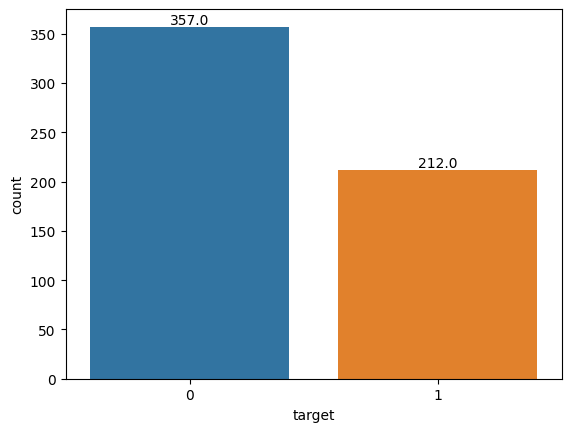

In [7]:
# Define a color palette (you can customize this list of colors)
colors = ["#1f77b4", "#ff7f0e"]

# Create the plot with different colors for each bar
ax = sns.countplot(x='target', data=df, palette=colors)

# Add count on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Show the plot
plt.show()


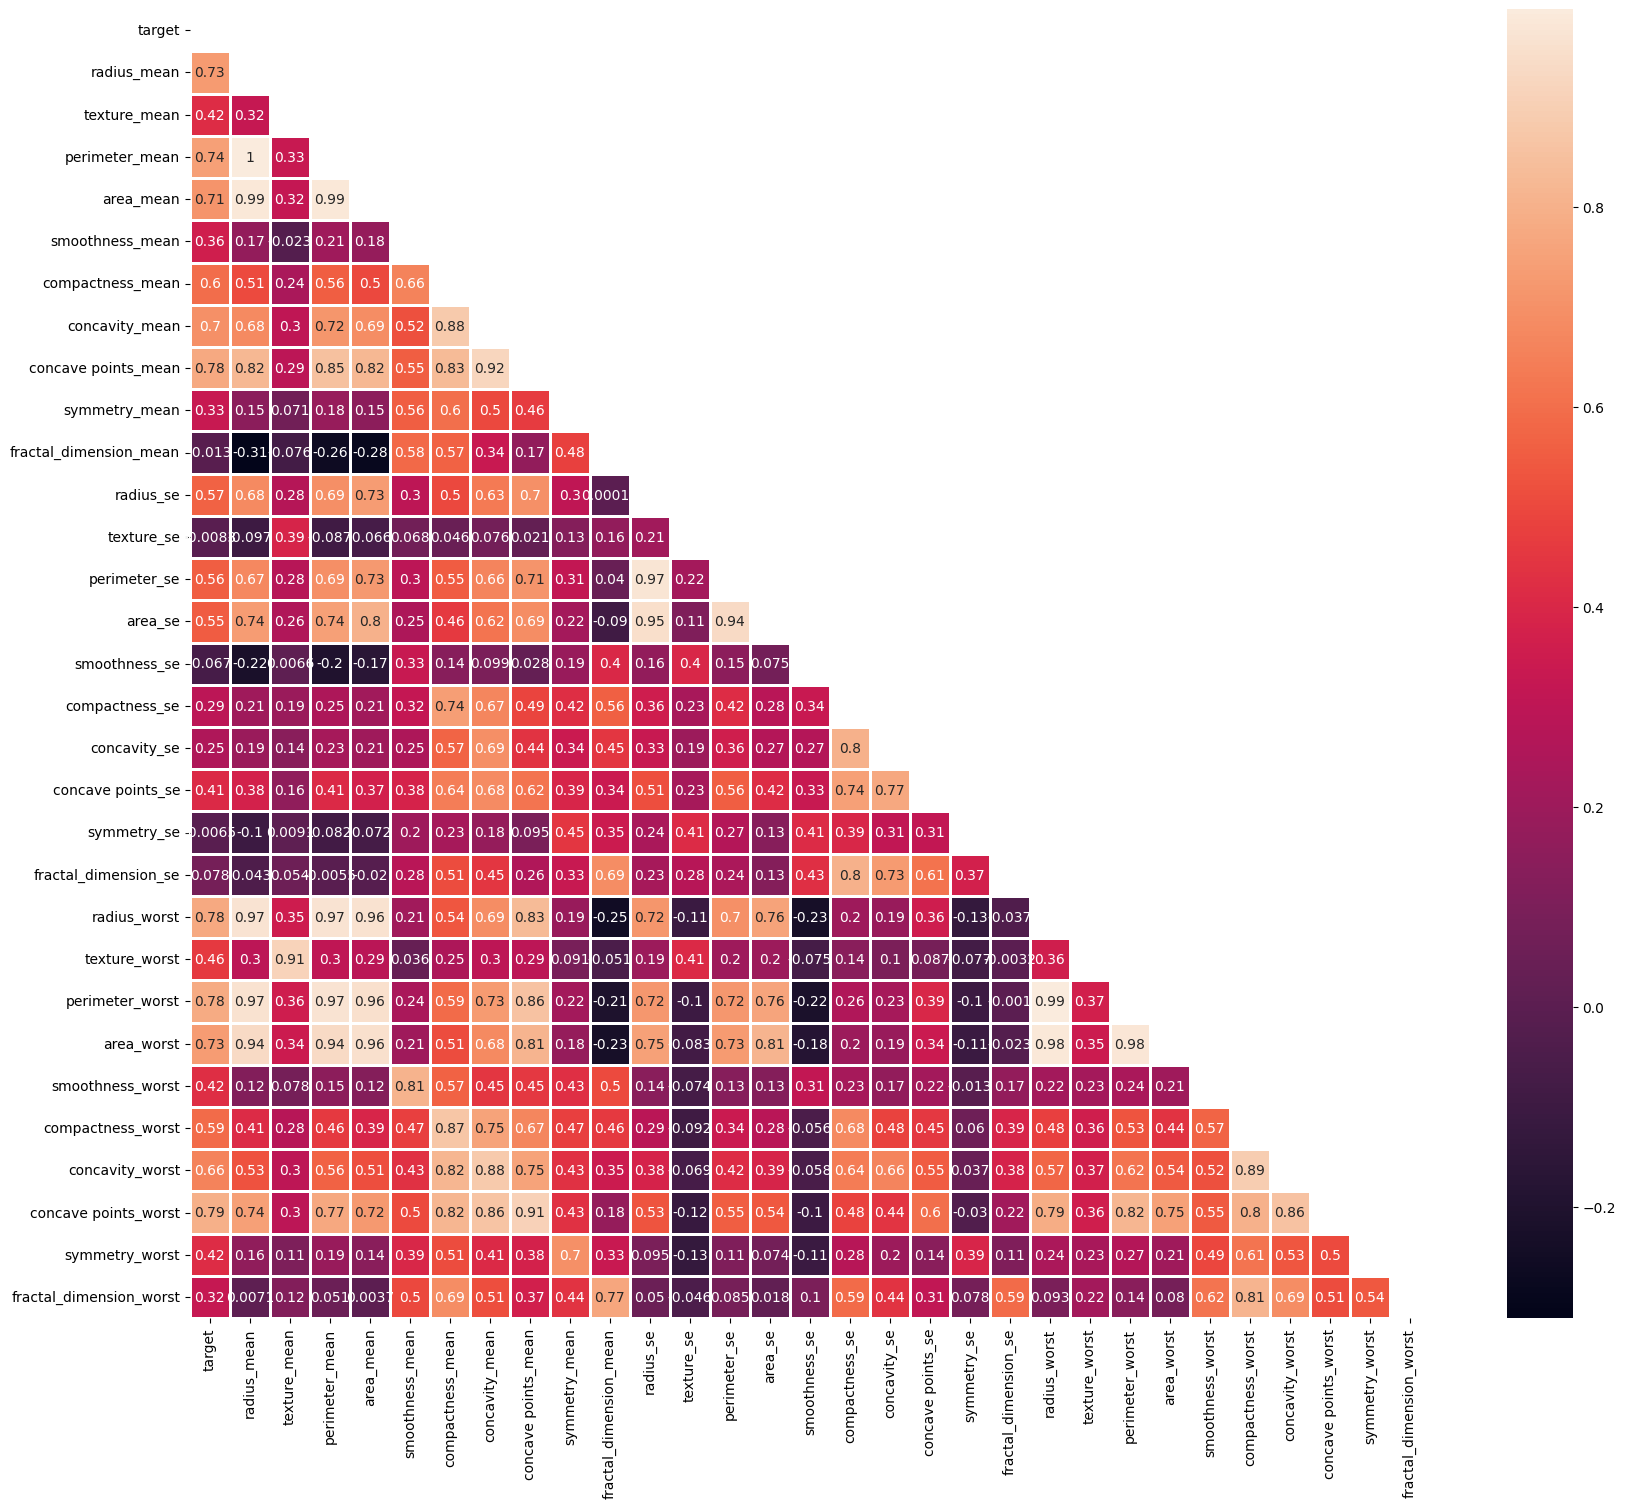

In [8]:
plt.figure(figsize=(20, 17))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix, linewidth=.8, cmap="rocket");

<a id="3"></a>
<div id="animated-container" style="position: relative;
            border-radius: 10px;
            padding: 10px;
            font-family: Arial, sans-serif;
            font-size: 36px;
            font-weight: 900;
            color: black;
            display: inline-block;
            text-transform: uppercase;
            box-shadow: 2px 2px 4px #888;
            text-shadow: 2px 2px 4px #888;
            overflow: hidden;
            background-color: #800606 ;
            cursor: pointer;" onclick="toggleAnimation()"> <!-- Added cursor pointer and onclick event -->
    <div style="position: absolute;
                top: 50%;
                right: 0; /* Adjusted to place on the right side */
                transform: translateY(45%);">
        <!-- <img src="https://www.kaggle.com/static/images/tier-animation-transparent.gif" alt="Cartoon Character" style="height: 100px; width: auto;"> -->
    </div>
    <div style="font-weight: bold;"></div>
    <span style="font-style: italic; text-shadow: 2px 2px 4px #888; color: white;">Outliers </span>
         <img src="https://www.kaggle.com/static/images/tier-animation-transparent.gif" alt="Cartoon Character" style="height: 50px; width: auto;">
</div>

<script>
    function toggleAnimation() {
        var container = document.getElementById('animated-container');
        var animationDiv = container.querySelector('div');
        if (animationDiv.style.animationPlayState === 'paused') {
            animationDiv.style.animationPlayState = 'running';
        } else {
            animationDiv.style.animationPlayState = 'paused';
        }
    }
</script>


In [9]:
x = df.drop(["target"], axis = 1)
y = df.target
columns = x.columns.tolist()

#####  This code performs outlier detection using the Local Outlier Factor (LOF) algorithm. 

#####  First, the code assumes that the outlier scores have already been computed and stored in the variable `X_score`. 

#####  The code then creates a scatter plot of the data points in a 2D space. Each data point is represented as a black point with a relatively small size. 

#####  Next, the radius for each point is calculated based on the outlier score, where points with higher outlier scores will have smaller radii. 

#####  After calculating the radii, the code updates the scatter plot to show the data points with sizes corresponding to the outlier scores. Outliers are represented as larger red circles (points with facecolor="none" and edgecolor="red"). 

#####  The code also sets the x and y labels, adds a legend, enables a grid on the plot, and sets the title to "Outlier Detection using Local Outlier Factor (LOF)". Finally, it shows the plot.


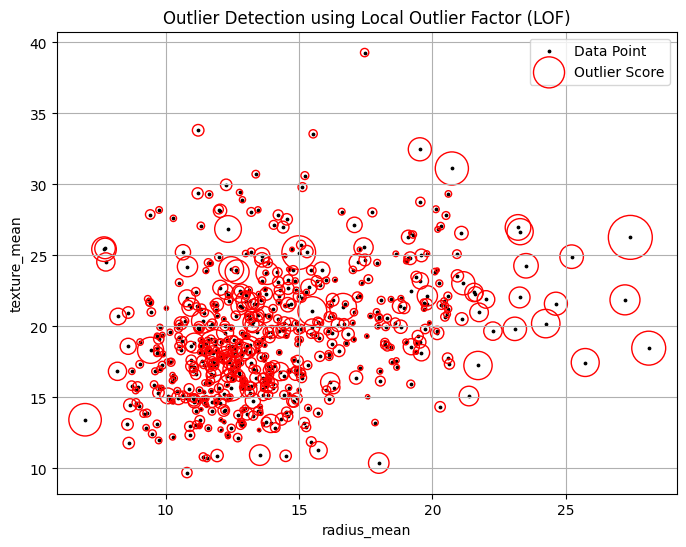

Outlier indices: [461]


In [10]:
# Fit the LocalOutlierFactor model to your data
lof = LocalOutlierFactor()
lof.fit(x)

# Get the negative outlier factor scores
X_score = lof.negative_outlier_factor_

# Create a scatter plot of the data points
plt.figure(figsize=(8, 6))
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], color="k", s=3, label="Data Point")

# Calculate the radius for each point based on the outlier score
radius = (X_score.max() - X_score) / (X_score.max() - X_score.min())

# Plot the points with sizes corresponding to the outlier score
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], s=1000 * radius, edgecolors="r", facecolors="none", label="Outlier Score")

plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.legend()
plt.grid(True)
plt.title('Outlier Detection using Local Outlier Factor (LOF)')
plt.show()

# Threshold for outlier detection
threshold_outlier = -2.5
filtre = X_score < threshold_outlier
outlier_index = np.where(filtre)[0]
print("Outlier indices:", outlier_index)


##### This code creates a visualization of the outlier detection process using the Local Outlier Factor (LOF) algorithm. 
##### It first creates a figure with a specific size. Then, it plots the outliers detected by the algorithm in `blue`, the regular data points in `black`, and the outlier scores with sizes corresponding to the score in `red`.
##### The x and y values for the outlier points, data points, and outlier scores are taken from a dataset represented by DataFrame `x`. The column names for the x and y axes are taken from `columns`. 
##### The visualization includes labels, grid lines, and a title. Finally, the plot is displayed.

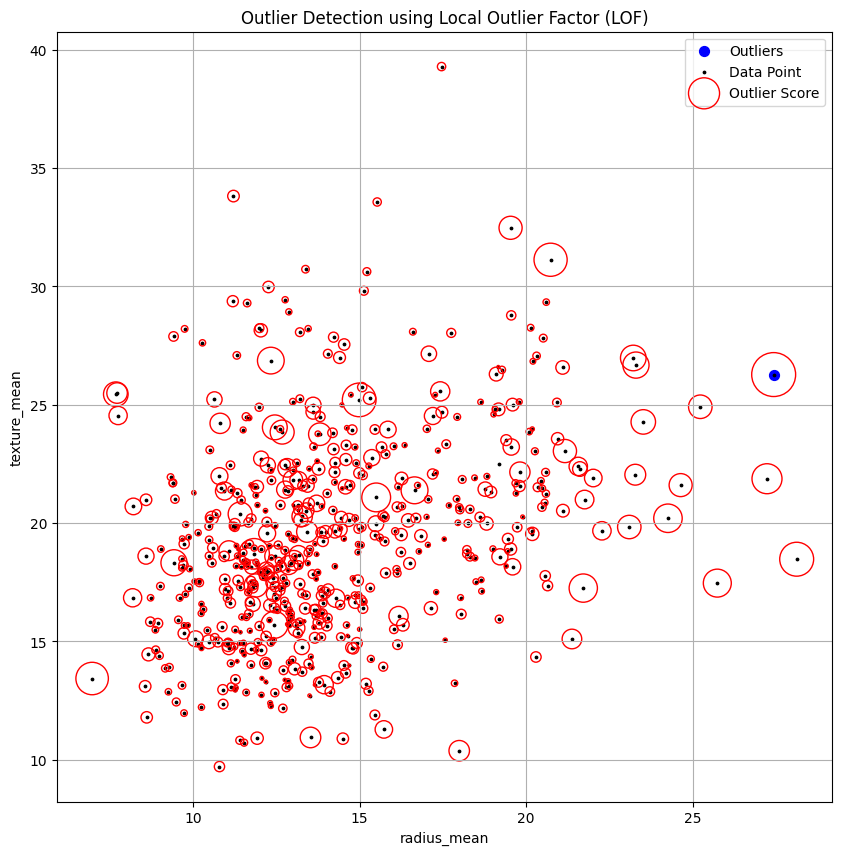

In [11]:
plt.figure(figsize=(10, 10))

# Plot outliers in blue
plt.scatter(x.iloc[outlier_index, 0], x.iloc[outlier_index, 1], color="blue", s=50, label="Outliers")

# Plot all data points
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], color="k", s=3, label="Data Point")

# Plot outlier scores with sizes corresponding to the outlier score
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], s=1000 * radius, edgecolors="r", facecolors="none", label="Outlier Score")

plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.legend()
plt.grid(True)
plt.title('Outlier Detection using Local Outlier Factor (LOF)')
plt.show()


In [12]:
# Drop outliers from the features dataset
x = x.drop(outlier_index)

# Drop corresponding labels from the target dataset
y = y.drop(outlier_index).values


<a id="4"></a>
<div id="animated-container" style="position: relative;
            border-radius: 10px;
            padding: 10px;
            font-family: Arial, sans-serif;
            font-size: 36px;
            font-weight: 900;
            color: black;
            display: inline-block;
            text-transform: uppercase;
            box-shadow: 2px 2px 4px #888;
            text-shadow: 2px 2px 4px #888;
            overflow: hidden;
            background-color: #800606 ;
            cursor: pointer;" onclick="toggleAnimation()"> <!-- Added cursor pointer and onclick event -->
    <div style="position: absolute;
                top: 50%;
                right: 0; /* Adjusted to place on the right side */
                transform: translateY(45%);">
        <!-- <img src="https://www.kaggle.com/static/images/tier-animation-transparent.gif" alt="Cartoon Character" style="height: 100px; width: auto;"> -->
    </div>
    <div style="font-weight: bold;"></div>
    <span style="font-style: italic; text-shadow: 2px 2px 4px #888; color: white;">Principal Component Analysis (PCA)</span>
         <img src="https://www.kaggle.com/static/images/tier-animation-transparent.gif" alt="Cartoon Character" style="height: 50px; width: auto;">
</div>

<script>
    function toggleAnimation() {
        var container = document.getElementById('animated-container');
        var animationDiv = container.querySelector('div');
        if (animationDiv.style.animationPlayState === 'paused') {
            animationDiv.style.animationPlayState = 'running';
        } else {
            animationDiv.style.animationPlayState = 'paused';
        }
    }
</script>


##### Principal Component Analysis (PCA) is a widely used dimensionality reduction technique in data science. Here's a concise explanation of how PCA works:
##### PCA is a statistical method that transforms a set of correlated variables into a smaller set of uncorrelated variables called principal components.
##### The goal of PCA is to extract the most important information from the data and express it as a set of new orthogonal variables, while minimizing information loss.

##### The key steps of PCA are:
##### Standardize the data by subtracting the mean and dividing by the standard deviation of each variable.

##### Calculate the covariance matrix of the standardized data.

##### Find the eigenvectors and eigenvalues of the covariance matrix.

##### Select the principal components as the eigenvectors with the largest eigenvalues.

##### Project the original data onto the principal components to get the transformed, lower-dimensional data

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20230420165431/Principal-Componenent-Analysisi.webp" style="width:80%">

> Here We Are Select The Best Number Of Component

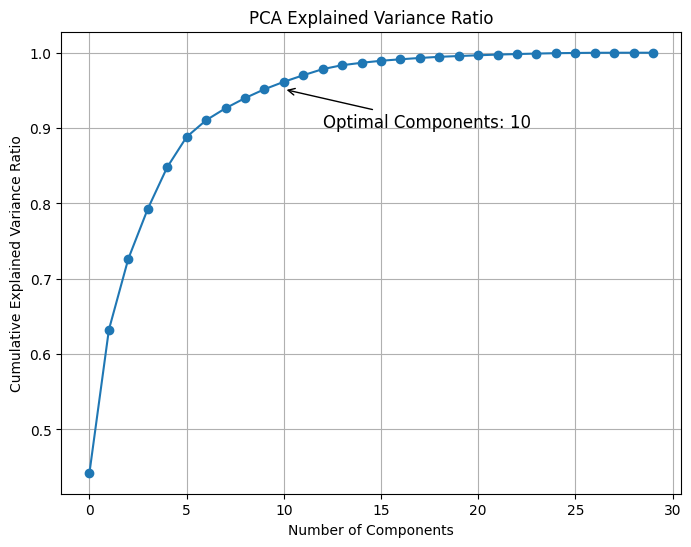

In [13]:
# Standardize the features
x_standardized = (x - x.mean()) / x.std()

# Apply PCA without specifying the number of components
pca = PCA()
pca.fit(x_standardized)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Find the optimal number of components
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
optimal_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Explained Variance Ratio')

# Annotate the plot with the optimal number of components
plt.annotate(f'Optimal Components: {optimal_components}', 
             xy=(optimal_components, cumulative_variance_ratio[optimal_components-1]),
             xytext=(optimal_components + 2, cumulative_variance_ratio[optimal_components-1] - 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)

plt.grid(True)
plt.show()

> Best Number of Component is `10`

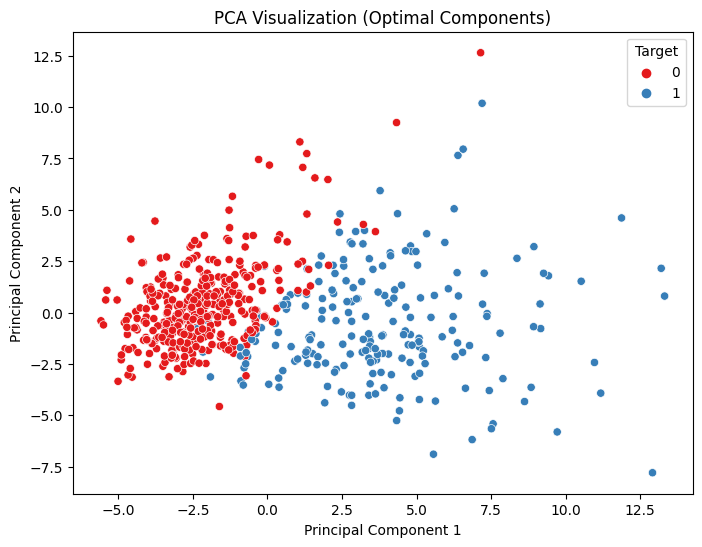

In [14]:
# Apply PCA with the optimal number of components
pca = PCA(n_components=10)
principal_components = pca.fit_transform(x_standardized)

# Create a DataFrame to hold the principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, 11)])

# Concatenate principal components with the target variable
final_df = pd.concat([principal_df, pd.DataFrame(y, columns=['target'])], axis=1)

# Plot the PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=final_df, palette='Set1')
plt.title('PCA Visualization (Optimal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target', loc='upper right')
plt.show()


<a id="5"></a>
<div id="animated-container" style="position: relative;
            border-radius: 10px;
            padding: 10px;
            font-family: Arial, sans-serif;
            font-size: 36px;
            font-weight: 900;
            color: black;
            display: inline-block;
            text-transform: uppercase;
            box-shadow: 2px 2px 4px #888;
            text-shadow: 2px 2px 4px #888;
            overflow: hidden;
            background-color: #800606 ;
            cursor: pointer;" onclick="toggleAnimation()"> <!-- Added cursor pointer and onclick event -->
    <div style="position: absolute;
                top: 50%;
                right: 0; /* Adjusted to place on the right side */
                transform: translateY(45%);">
        <!-- <img src="https://www.kaggle.com/static/images/tier-animation-transparent.gif" alt="Cartoon Character" style="height: 100px; width: auto;"> -->
    </div>
    <div style="font-weight: bold;"></div>
    <span style="font-style: italic; text-shadow: 2px 2px 4px #888; color: white;">Machine Learning</span>
         <img src="https://www.kaggle.com/static/images/tier-animation-transparent.gif" alt="Cartoon Character" style="height: 50px; width: auto;">
</div>

<script>
    function toggleAnimation() {
        var container = document.getElementById('animated-container');
        var animationDiv = container.querySelector('div');
        if (animationDiv.style.animationPlayState === 'paused') {
            animationDiv.style.animationPlayState = 'running';
        } else {
            animationDiv.style.animationPlayState = 'paused';
        }
    }
</script>


##### Logistic Regression is a popular statistical model used for binary classification tasks, where the goal is to predict the probability of an instance belonging to one of two classes. Despite its name, Logistic Regression is actually a classification algorithm rather than a regression algorithm.

##### The underlying principle of Logistic Regression is based on the logistic function, also known as the sigmoid function. The sigmoid function maps any real-valued number to a value between 0 and 1. In Logistic Regression, this function is used to model the probability that a given input belongs to a certain class.

##### The logistic function is defined as:

##### `sigmoid(z) = 1 / (1 + e^(-z))`

##### In Logistic Regression, we assume that the relationship between the input features (independent variables) and the output class (dependent variable) is linear. The linear combination of the input features is passed through the logistic function to obtain the predicted probability.

##### The mathematical representation of Logistic Regression can be written as:

##### `p(y=1|x) = sigmoid(w^T * x + b)`

##### where:

##### p(y=1|x) is the probability that the output class is 1 given the input x.
##### is a vector of weights corresponding to the input features.
##### b is the bias term.

<img src="https://www.ejable.com/wp-content/uploads/2023/11/linear-regression-vs-logistic-regression-2.webp" style="width:80%">

In [15]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(principal_components, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9736842105263158

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        70
           1       0.98      0.95      0.97        44

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114





<span style="color: #800606; font-size: 110%; font-weight: bold;">"What are your thoughts on these findings?
`Upvote` if you found this analysis helpful!"\
"I'd love to hear your insights or questions in the comments below. Let's keep the conversation going!"</span>

<img src="https://img.freepik.com/free-vector/thank-you-lettering_1262-6963.jpg?size=626&ext=jpg&ga=GA1.1.735520172.1710633600&semt=ais" width="1000">